# Project 1 - Comcast Telecom Consumer Complaints

**Descriptions:** 

"Comcast is an American global telecommunication company. The firm has been providing terrible customer service.
They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined
them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service."

In [1]:
#import pandas library
import pandas as pd

In [2]:
#import .csv file to jupter notebook
df = pd.read_csv('../input/comcast-telecom-complaints-data/Comcast_telecom_complaints_data.csv')

# Data Explorations

In [3]:
#List the first five rows
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
#2224 rows and 11 variables
df.shape

(2224, 11)

In [5]:
#Check data type for each columns
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [6]:
#Check for any missing data in the dataset before analysis
df.isnull().any()

Ticket #                       False
Customer Complaint             False
Date                           False
Date_month_year                False
Time                           False
Received Via                   False
City                           False
State                          False
Zip code                       False
Status                         False
Filing on Behalf of Someone    False
dtype: bool

# Analysis Task

In [7]:
#Convert Date to data time format
df['Date_month_year']=pd.to_datetime(df['Date_month_year'])
df['month']= pd.to_datetime(df['Date_month_year'], format = "%d-%m-%y").dt.month
df['day']= pd.to_datetime(df['Date_month_year'], format = "%d-%m-%y").dt.day

In [8]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,day
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26


In [9]:
#Number of monthly complaints 
df['month'].value_counts(sort=True).to_frame('Number of Compliants')

,Number of Compliants
6,1046
4,375
5,317
8,67
12,65
2,59
1,55
9,55
10,53
7,49


In [10]:
#Number of complaints based on day 
df['day'].value_counts(sort=True).to_frame('Number of Compliants')

,Number of Compliants
6,272
24,249
23,225
4,206
5,131
25,126
26,90
29,87
30,86
27,81


<AxesSubplot:title={'center':'Number of Complaints (Month)'}, xlabel='Month', ylabel='Number of Complaints'>

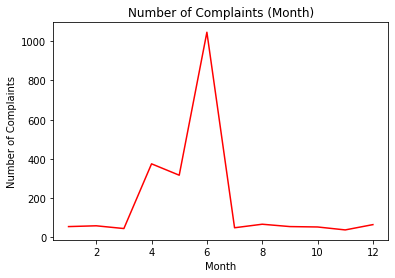

In [11]:
#Plot Number of complaints per month 
df['month'].value_counts(sort= False).sort_index().plot(color = 'red', title="Number of Complaints (Month)",xlabel="Month",ylabel="Number of Complaints")

<AxesSubplot:title={'center':'Number of Complaints (Day)'}, xlabel='Day', ylabel='Number of Complaints'>

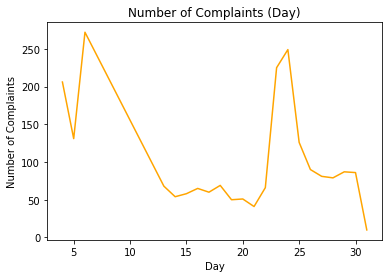

In [12]:
#Plot Number of complaints per day 
df['day'].value_counts(sort= False).sort_index().plot(color='Orange',title="Number of Complaints (Day)",xlabel="Day",ylabel="Number of Complaints")

In [13]:
#Display frequency of complaint types
type_of_complaints=df['Customer Complaint'].astype(str).str.lower().value_counts(sort=True)
type_of_complaints.to_frame('Number of Compliants (by type)')

,Number of Compliants (by type)
comcast,102
comcast data cap,30
comcast internet,29
comcast data caps,21
comcast billing,18
...,...
monthly data caps,1
"comcast/xfinity poor service, fraudulent billing and collection",1
lost emails/billing,1
improper billing and non resolution of issues,1


In [14]:
#Identify unique type of status
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [15]:
#Map Open and Pending 'status' as 'Open', 'Closed' and 'Solved' as 'Closed'.
df['new_status']=df['Status'].map({'Closed':'Closed','Open':'Open','Solved':'Closed','Pending':'Open'})
df[['State','new_status']].head()

,State,new_status
0,Maryland,Closed
1,Georgia,Closed
2,Georgia,Closed
3,Georgia,Open
4,Georgia,Closed


In [16]:
#1) Group by State and new_status 2) count number of elements 3) unstack for plotting graphs otherwise it will display an key error
new=df[['State','new_status']].groupby(['State','new_status']).size().unstack().reset_index()
new.fillna(0, inplace=True)
new.head()

new_status,State,Closed,Open
0,Alabama,17.0,9.0
1,Arizona,14.0,6.0
2,Arkansas,6.0,0.0
3,California,159.0,61.0
4,Colorado,58.0,22.0


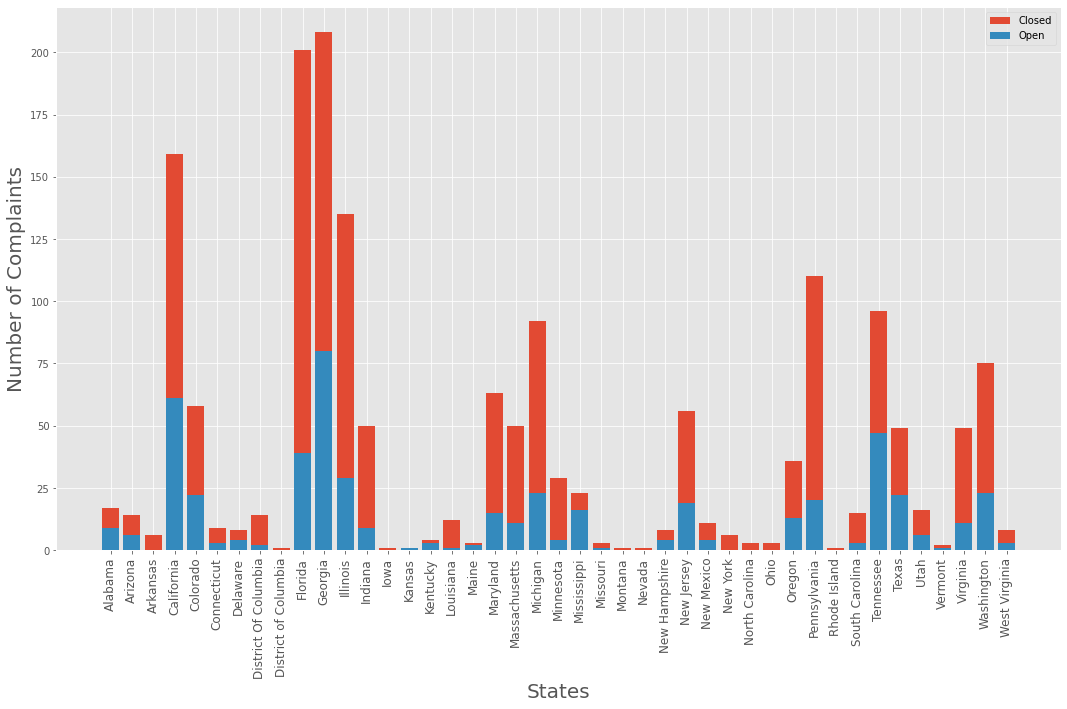

In [17]:
#Create a stacked bar graph for open and closed consumer complaints.
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
fig= plt.figure(figsize=(18,10))

plt.bar(new['State'], new['Closed'], label='Closed')
plt.bar(new['State'], new['Open'], label='Open')

plt.xticks(rotation =90, size=12)
plt.legend()

plt.xlabel('States',size=20)
plt.ylabel('Number of Complaints',size=20)

plt.show()

In [18]:
#Number of complaints by state (Method 1)
#Georgia has the highest complaints.
num_of_complaint_by_state=df['State'].str.lower().value_counts(sort=True).to_frame()
num_of_complaint_by_state

,State
georgia,288
florida,240
california,220
illinois,164
tennessee,143
pennsylvania,130
michigan,115
washington,98
colorado,80
maryland,78


In [19]:
#Number of complaints by state (Method 2)
#Georgia has the highest complaints.
pd.pivot_table(df,index='State', values='Customer Complaint', aggfunc='count').sort_values(by='Customer Complaint', ascending=False)

,Customer Complaint
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143
Pennsylvania,130
Michigan,115
Washington,98
Colorado,80


In [20]:
#Calculate the percentage for both Closed_percentage and Open_percentage
new.fillna(0, inplace=True)
total=new['Closed'] + new['Open']
new['Closed_percentage']=((new['Closed']/total)*100).round(2)
new['Open_percentage']=((new['Open']/total)*100).round(2)

In [21]:
#Highest Perecentage of unresolved complaints
new.sort_values('Open_percentage',ascending=False)

new_status,State,Closed,Open,Closed_percentage,Open_percentage
14,Kansas,1.0,1.0,50.00,50.00
15,Kentucky,4.0,3.0,57.14,42.86
22,Mississippi,23.0,16.0,58.97,41.03
17,Maine,3.0,2.0,60.00,40.00
0,Alabama,17.0,9.0,65.38,34.62
39,Vermont,2.0,1.0,66.67,33.33
6,Delaware,8.0,4.0,66.67,33.33
26,New Hampshire,8.0,4.0,66.67,33.33
36,Tennessee,96.0,47.0,67.13,32.87
37,Texas,49.0,22.0,69.01,30.99


In [22]:
#Percentage of complaints resolved through Internet and customer care calls. 76.75% cases have been resolved. 23.25 cases are not resloved.
result=df[df['Received Via'].isin(['Internet','Customer Care Call'])]['new_status'].value_counts(normalize = True).to_frame('Percentage of complaints (Closed vs Open)')
result*100

,Percentage of complaints (Closed vs Open)
Closed,76.753597
Open,23.246403
